In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df=pd.read_csv("D:\TEJAS FORMAT\EXCELR ASSIGMENTS\EXCELR ASSIGMENTS\CAR PRICE PREDICTION\carprice.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape

(205, 26)

## Basically, Dataset is having 205 rows & 26 columns some categorical variables and we need to convert it into dummies & car id is not required as we have the index so drop car id

In [5]:
df=df.drop(["car_ID"],axis=1)

In [6]:
#Data Shape
df.shape

(205, 25)

In [7]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [8]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [9]:
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
#info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

## In Car name we have manufacture model names which is of no use further so removing model name.

In [11]:
CarCompany = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CarCompany",CarCompany)

In [12]:
df=df.drop(["CarName"],axis=1)
df.head()

,symboling,fueltype,CarCompany,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
print(df["drivewheel"].unique())
print(df["fuelsystem"].unique())
print(df["enginetype"].unique())
print(df["carbody"].unique())

['rwd' 'fwd' '4wd']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


In [14]:
CarCompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

## As we have seen all unique values & in car manufacturer there some spelling mistakes which we have to correct it.

In [15]:
def replace_name(a,b):
    df.CarCompany.replace(a,b,inplace=True)

replace_name("maxda","mazda")
replace_name("nissan","Nissan")
replace_name("porcshce","porsche")
replace_name("vokswagen","volkswagen")
replace_name("vw","volkswagen")
replace_name("toyouta","toyota")



print(df["CarCompany"].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


## Now in cylinder number & door number are present in cateogrical replacing it with numeric value as meaning is same

In [16]:
df["cylindernumber"].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [17]:
def convert_feature(x):
    return x.map({"two":2,"three":3,"four":4,"five":5,"six":6,"eight":8,"twelve":12})
                  
df["cylindernumber"]=df[["cylindernumber"]].apply(convert_feature)

In [18]:
df["doornumber"].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [19]:
def number(x):
    return x.map({"two":2,"four":4})
df["doornumber"]=df[["doornumber"]].apply(number)

In [20]:
# Data Description
df.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Seperating the numeric & categorical data

In [21]:
df_numeric = df.select_dtypes(include =['int64','float64'])
df_numeric.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [22]:
df_numeric.shape

(205, 17)

In [23]:
df_categorical=df.select_dtypes(include=["object"])
df_categorical.head()

,fueltype,CarCompany,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
0,gas,alfa-romero,std,convertible,rwd,front,dohc,mpfi
1,gas,alfa-romero,std,convertible,rwd,front,dohc,mpfi
2,gas,alfa-romero,std,hatchback,rwd,front,ohcv,mpfi
3,gas,audi,std,sedan,fwd,front,ohc,mpfi
4,gas,audi,std,sedan,4wd,front,ohc,mpfi


<Figure size 2160x2520 with 0 Axes>

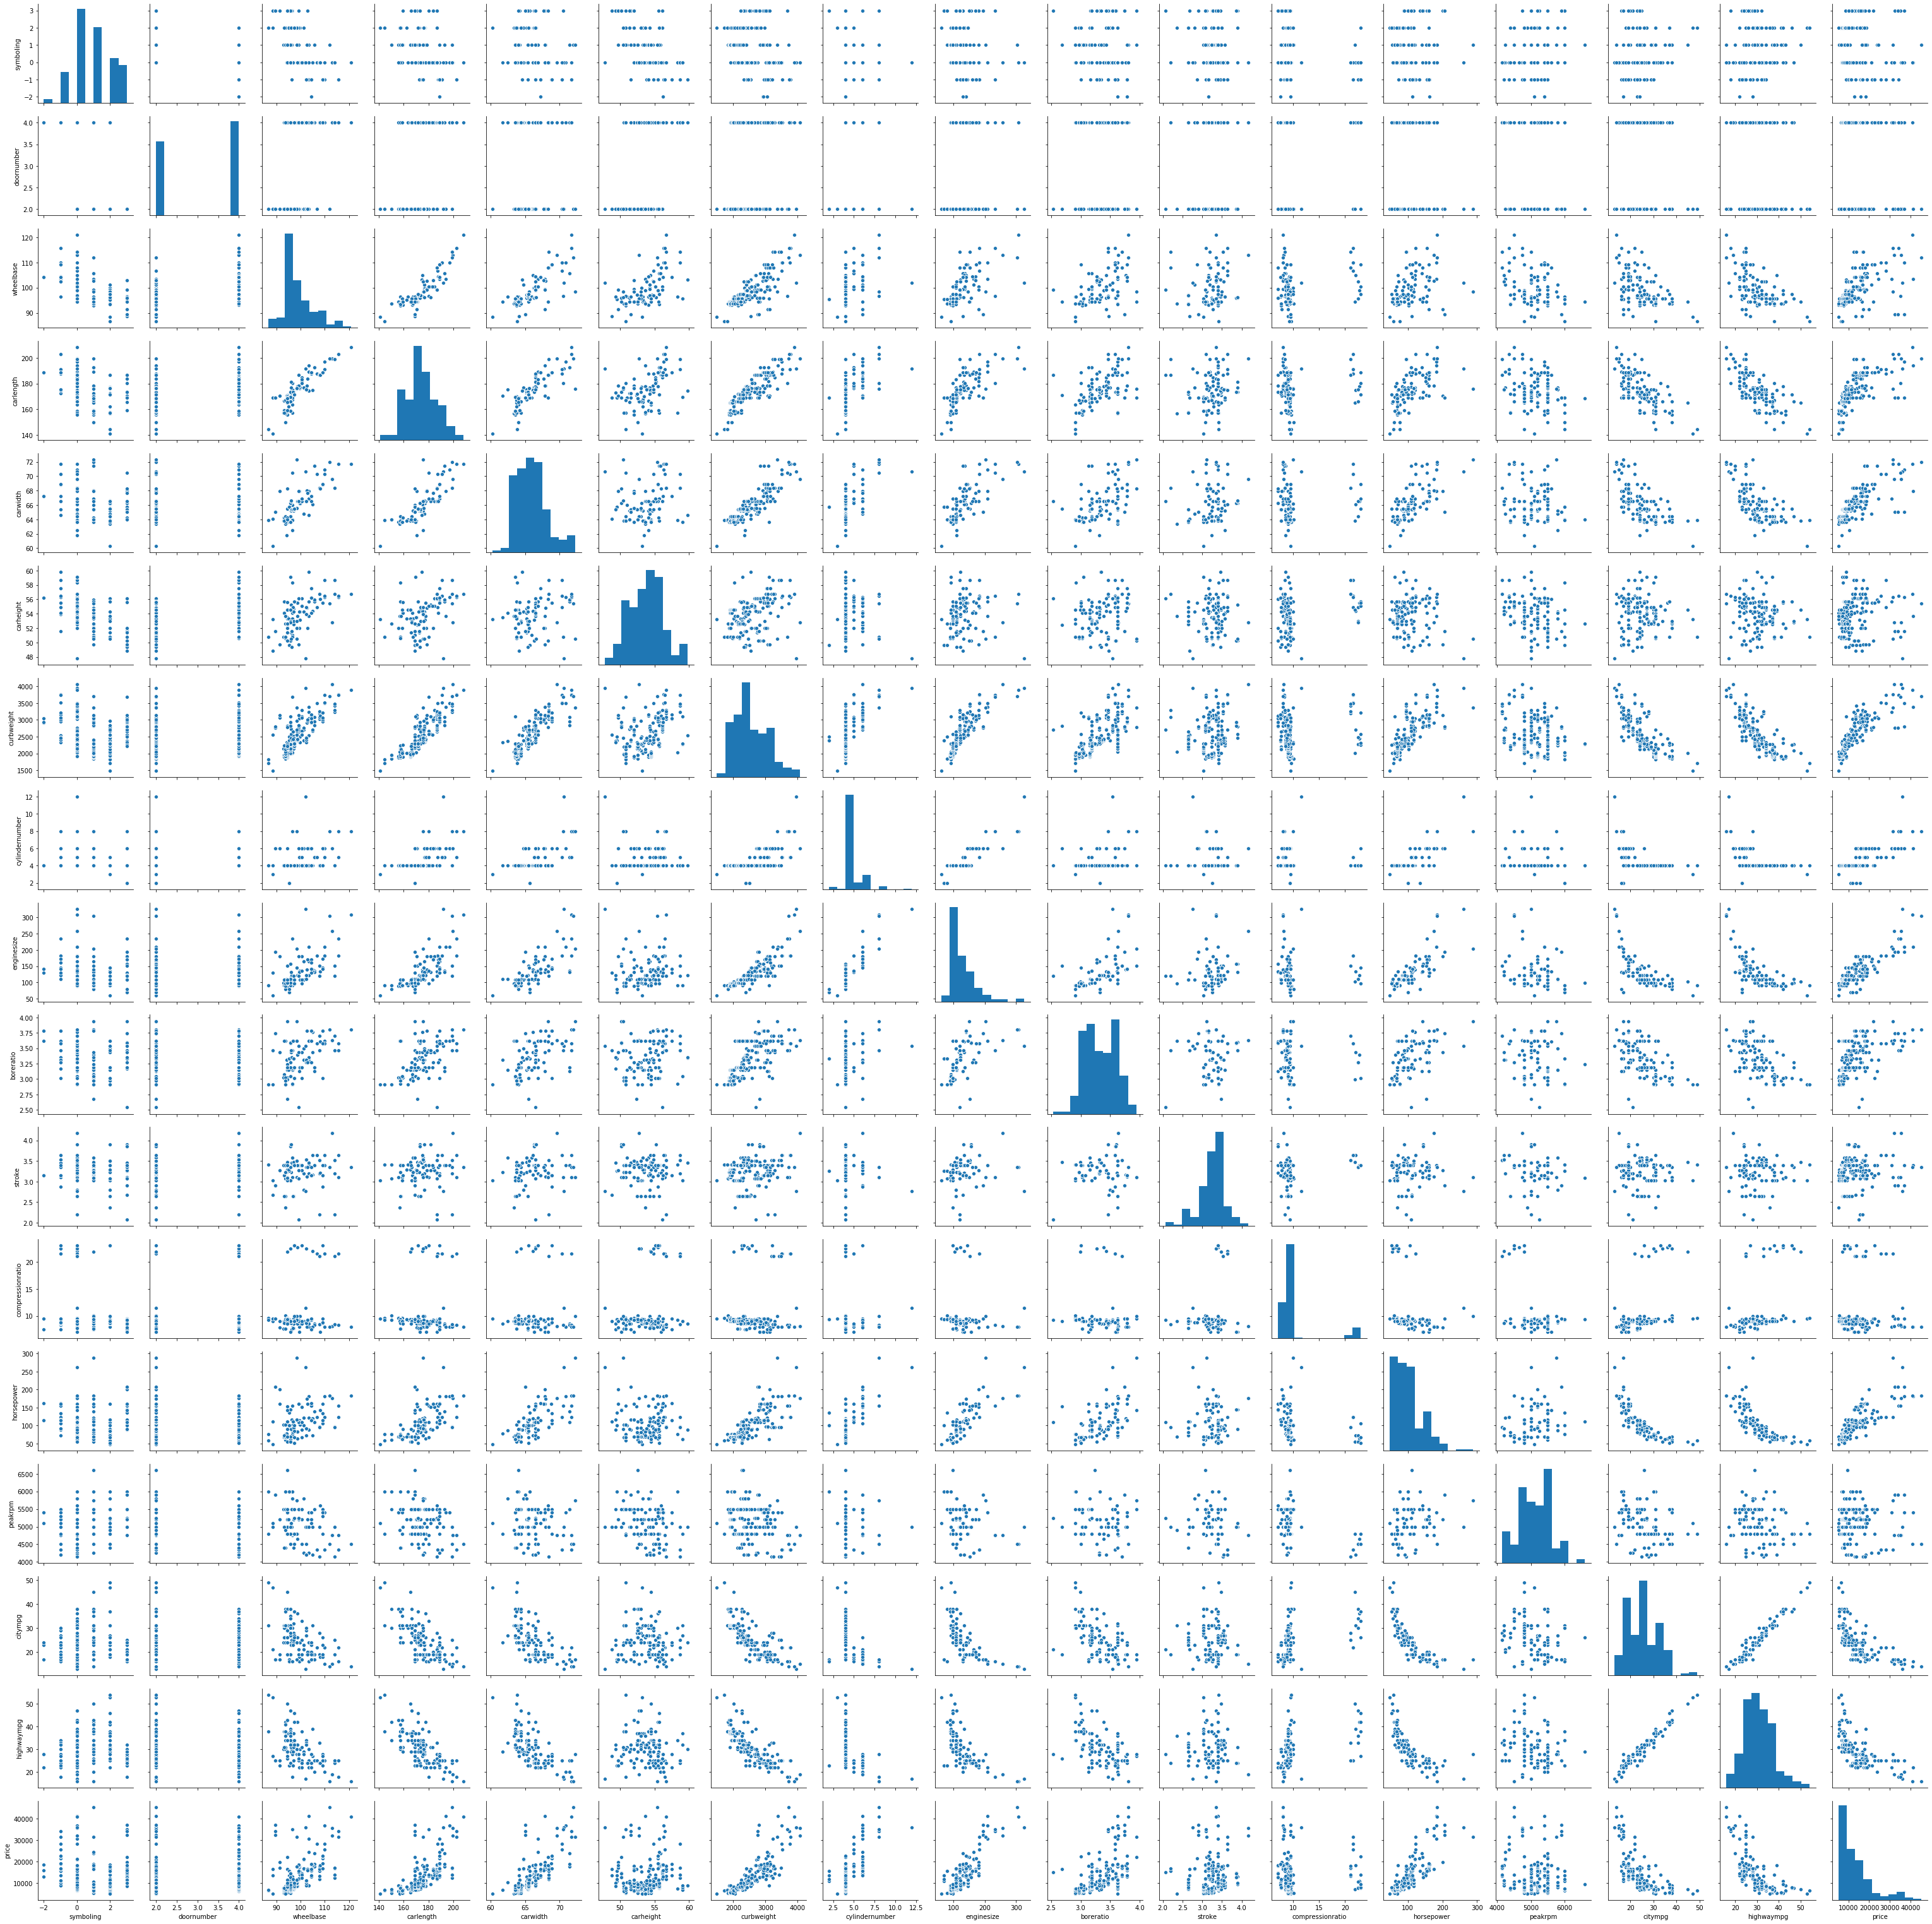

In [24]:
plt.figure(figsize=(30,35))
sns.pairplot(df_numeric)
plt.show()


# Visualising the data for categorical values

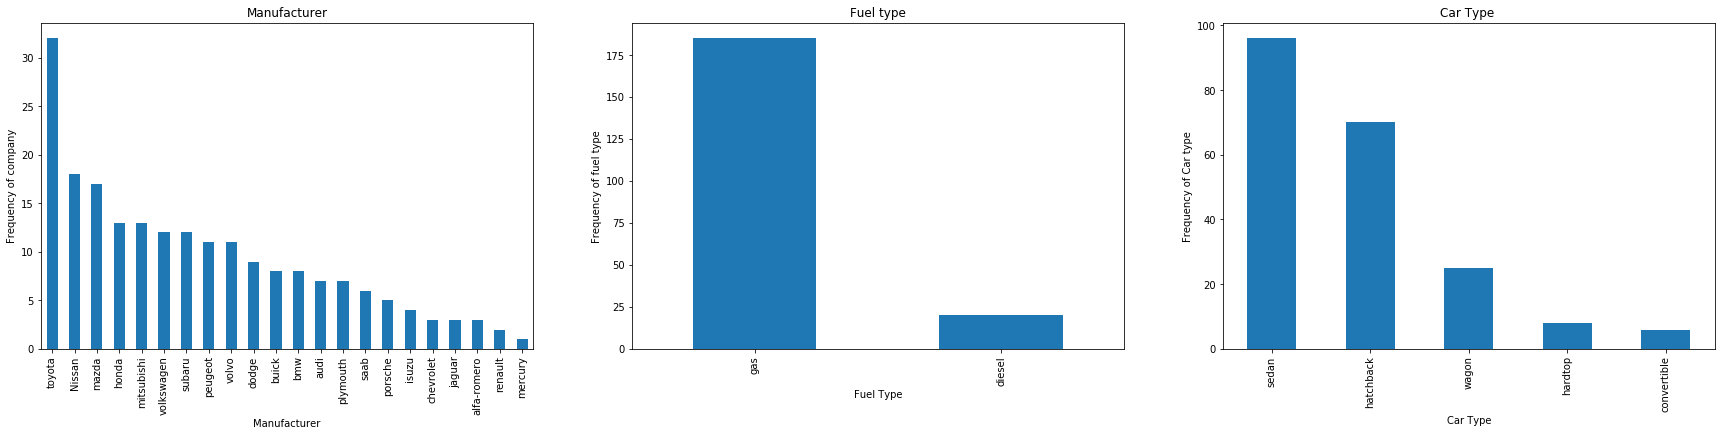

In [25]:
plt.figure(figsize=(30, 6))

plt.subplot(1,3,1)
plt1 = df.CarCompany.value_counts().plot('bar')
plt.title('Manufacturer')
plt1.set(xlabel = 'Manufacturer', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = df.fueltype.value_counts().plot('bar')
plt.title('Fuel type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = df.carbody.value_counts().plot('bar')
plt.title('Car Type ')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()


Text(0.5, 1.0, 'Car Company vs Price')

<Figure size 1800x432 with 0 Axes>

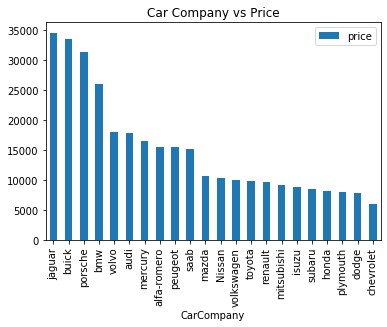

In [26]:
plt.figure(figsize=(25, 6))

df1 = pd.DataFrame(df.groupby(['CarCompany'])['price'].mean().sort_values(ascending = False))
df1.plot.bar()
plt.title('Car Company vs Price')

### 1. Toyota is most popular car as sees
### 2. Gas fuel cars are more preffered.
### 3. Sedan is most favored car.
### 4. Jaguar,buick,porsche,bmw high cost cars.


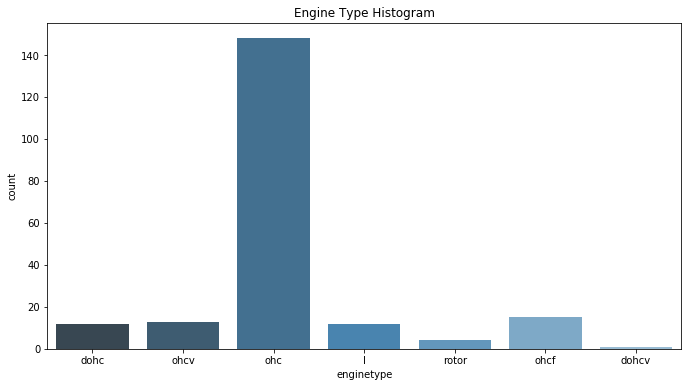

In [27]:
plt.figure(figsize=(25,6))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(df.enginetype, palette=("Blues_d"))
plt.show()

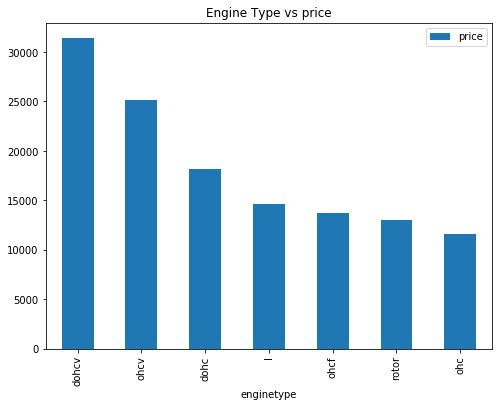

In [30]:
df1 = pd.DataFrame(df.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('Engine Type vs price')
plt.show()

### In first graph ohc engine is most preferred due to its rigidity
### in second graph dohcv engine is having  high cost 

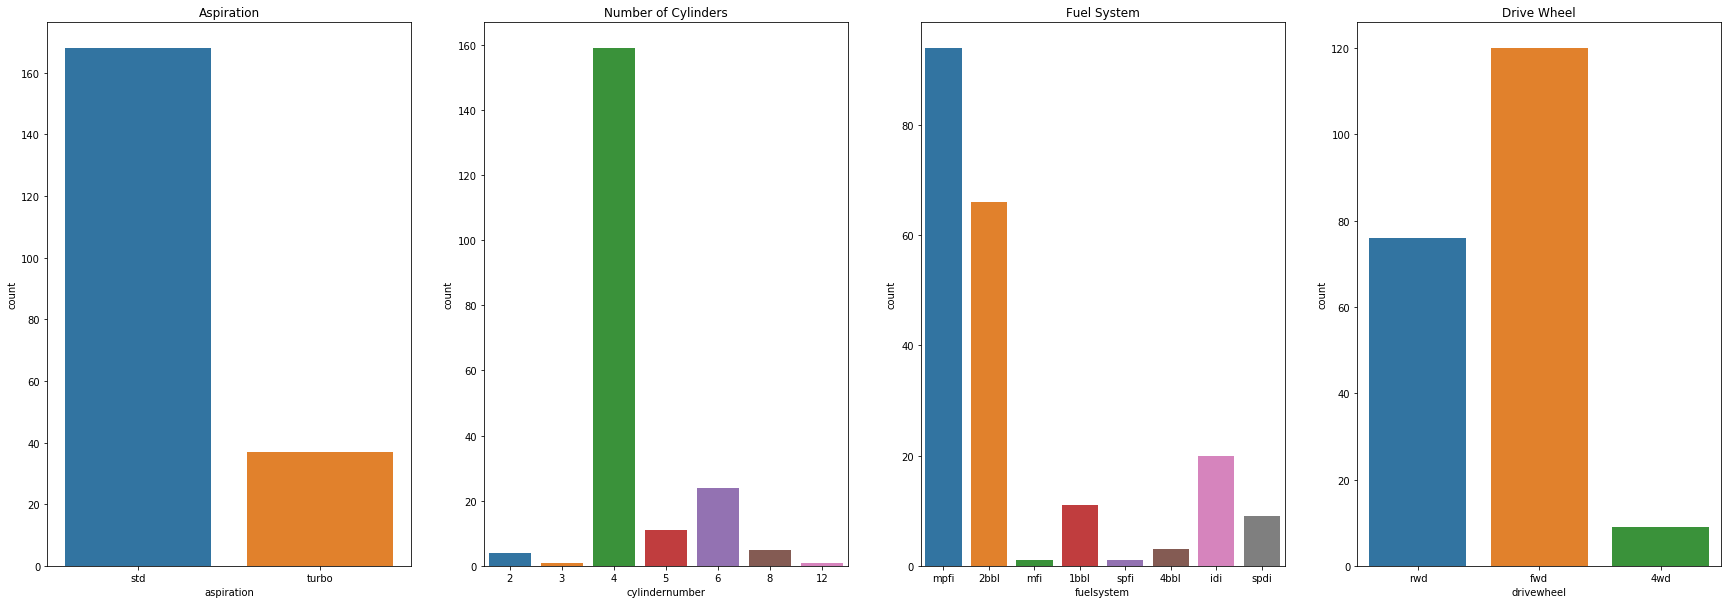

In [35]:
plt.figure(figsize=(30,10))

plt.subplot(1,4,1)
plt.title('Aspiration')
sns.countplot(x="aspiration", data=df)

plt.subplot(1,4,2)
plt.title('Number of Cylinders')
sns.countplot(x="cylindernumber", data=df)

plt.subplot(1,4,3)
plt.title('Fuel System')
sns.countplot(x="fuelsystem", data=df)

plt.subplot(1,4,4)
plt.title('Drive Wheel')
sns.countplot(x="drivewheel", data=df)

plt.show()

### 1.Gas Aspiration is favoured as compare to turbo as maybe it costs high.
### 2.Four Cylinder cars are more as compare to others
### 3. mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference.
### 4. fwd drivewheel is preffered .


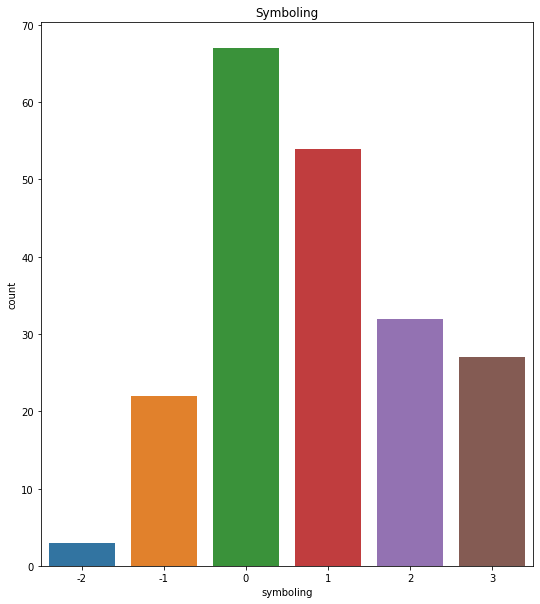

In [36]:
plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
plt.title('Symboling')
sns.countplot(x="symboling", data=df)

plt.show()

### 0 & 1 are mostly sold cars

# Box Plots

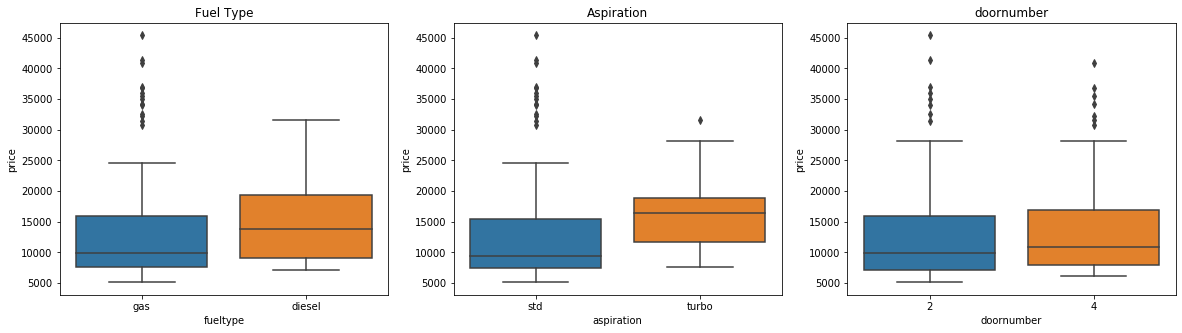

In [37]:
plt.figure(figsize=(20,5))


plt.subplot(1,3,1)
plt.title('Fuel Type')
sns.boxplot(x="fueltype", y="price", data=df)

plt.subplot(1,3,2)
plt.title('Aspiration')
sns.boxplot(x="aspiration", y="price", data=df)

plt.subplot(1,3,3)
plt.title('doornumber')
sns.boxplot(x="doornumber", y="price", data=df)

plt.show()

### 1. Price of diesel cars is more
### 2. Turbo aspiration costs more than std as before we have seen in histogram
### 3. Two & Four doors costs are equal

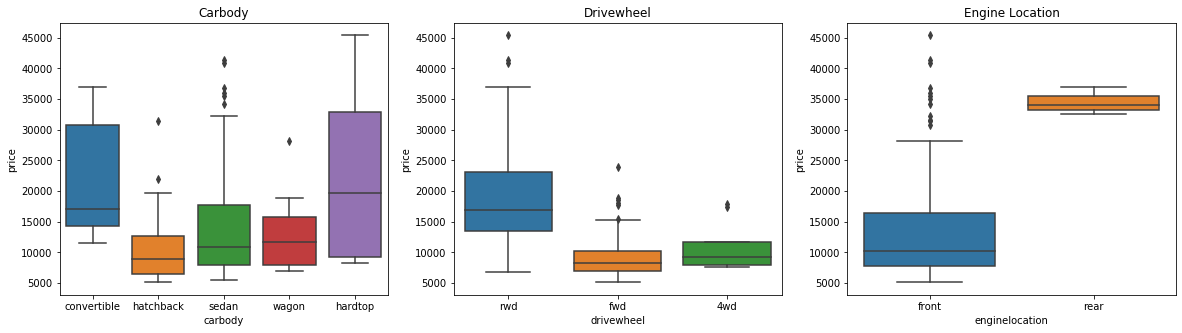

In [38]:
plt.figure(figsize=(20,5))


plt.subplot(1,3,1)
plt.title('Carbody')
sns.boxplot(x="carbody", y="price", data=df)

plt.subplot(1,3,2)
plt.title('Drivewheel')
sns.boxplot(x="drivewheel", y="price", data=df)

plt.subplot(1,3,3)
plt.title('Engine Location')
sns.boxplot(x="enginelocation", y="price", data=df)

plt.show()

### 1.Hardtop cars cost is higher as compare to others
### 2.rwd drive wheel price is high as compare to fwd,4whd.
### 3.Rear engine are like having constant high range.

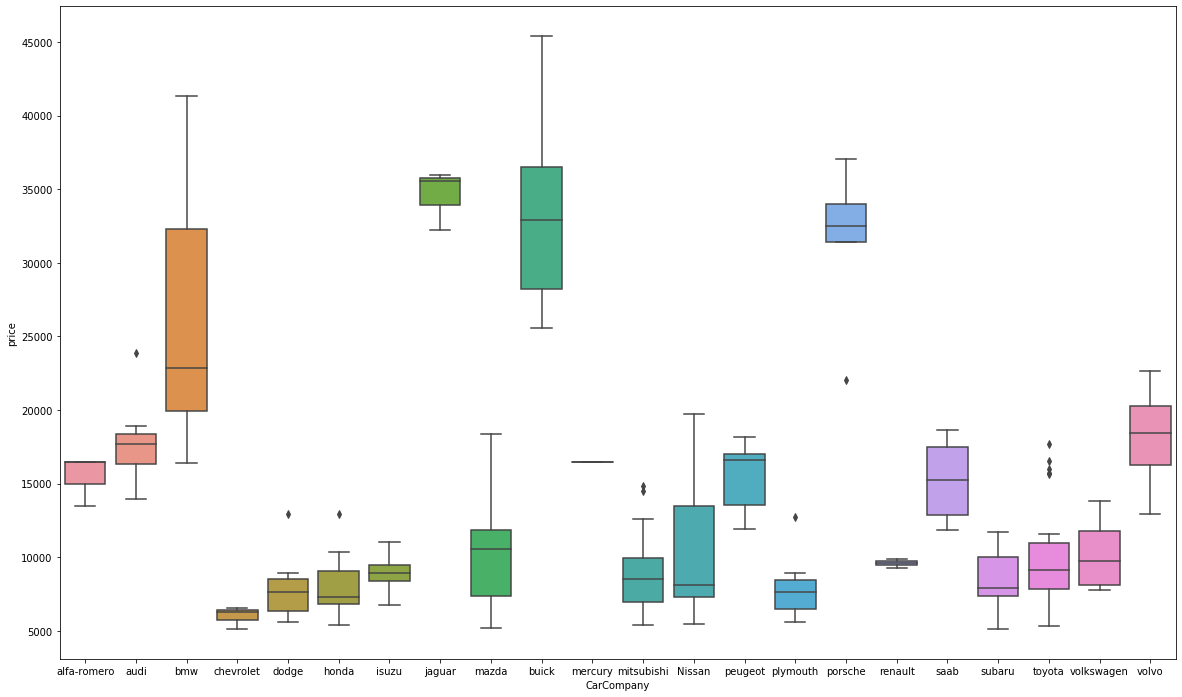

In [39]:
plt.figure(figsize = (20,12))
sns.boxplot(x = 'CarCompany', y = 'price', data = df)

### From the price boxplot it is clear that The brands with the most expensive vehicles in the dataset belong to Bmw,Buick,Jaguar and porsche.Whereas the lower priced cars belong to chevrolet

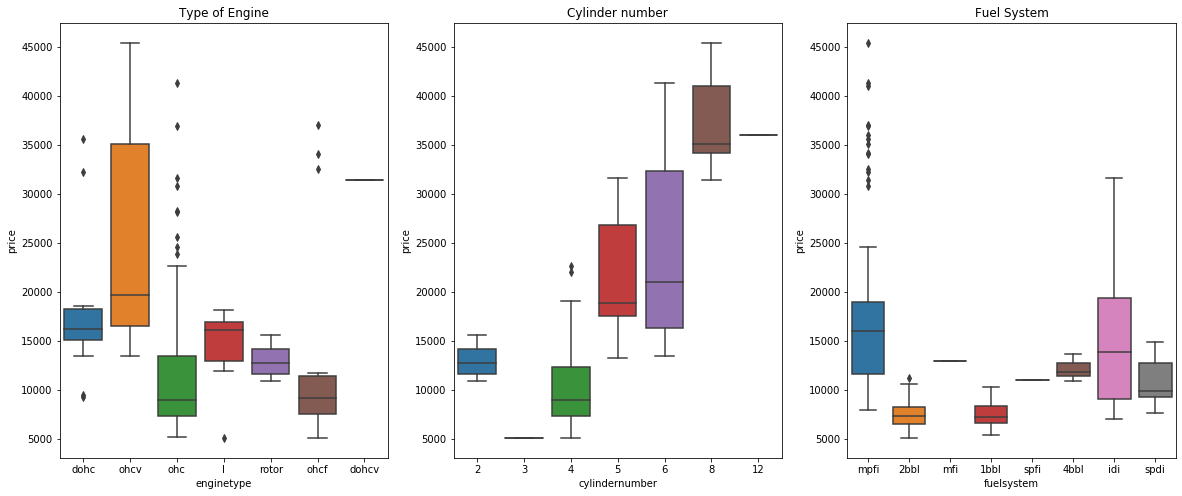

In [40]:
plt.figure(figsize=(20,8))


plt.subplot(1,3,1)
plt.title('Type of Engine')
sns.boxplot(x="enginetype", y="price", data=df)

plt.subplot(1,3,2)
plt.title('Cylinder number')
sns.boxplot(x="cylindernumber", y="price", data=df)

plt.subplot(1,3,3)
plt.title('Fuel System')
sns.boxplot(x="fuelsystem", y="price", data=df)

plt.show()

### It is clear that vehicles Multi-port Fuel Injection [MPFI] fuelsystem have the highest median price. There are 
### also some outliers on the higher price side having MPFI systems.

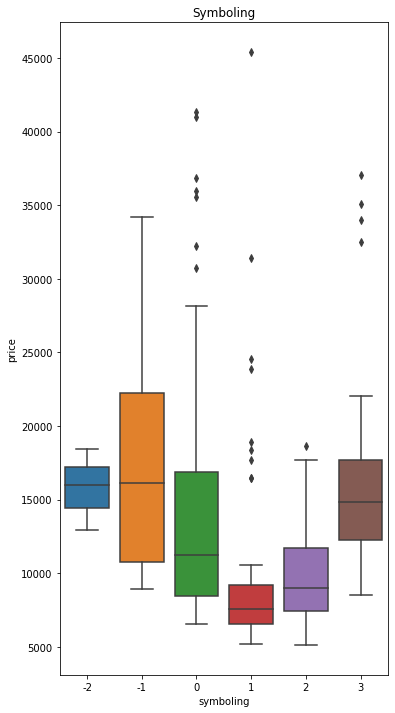

In [41]:
plt.figure(figsize=(20,12))

plt.subplot(1,3,1)
plt.title('Symboling')
sns.boxplot(x="symboling", y="price", data=df)

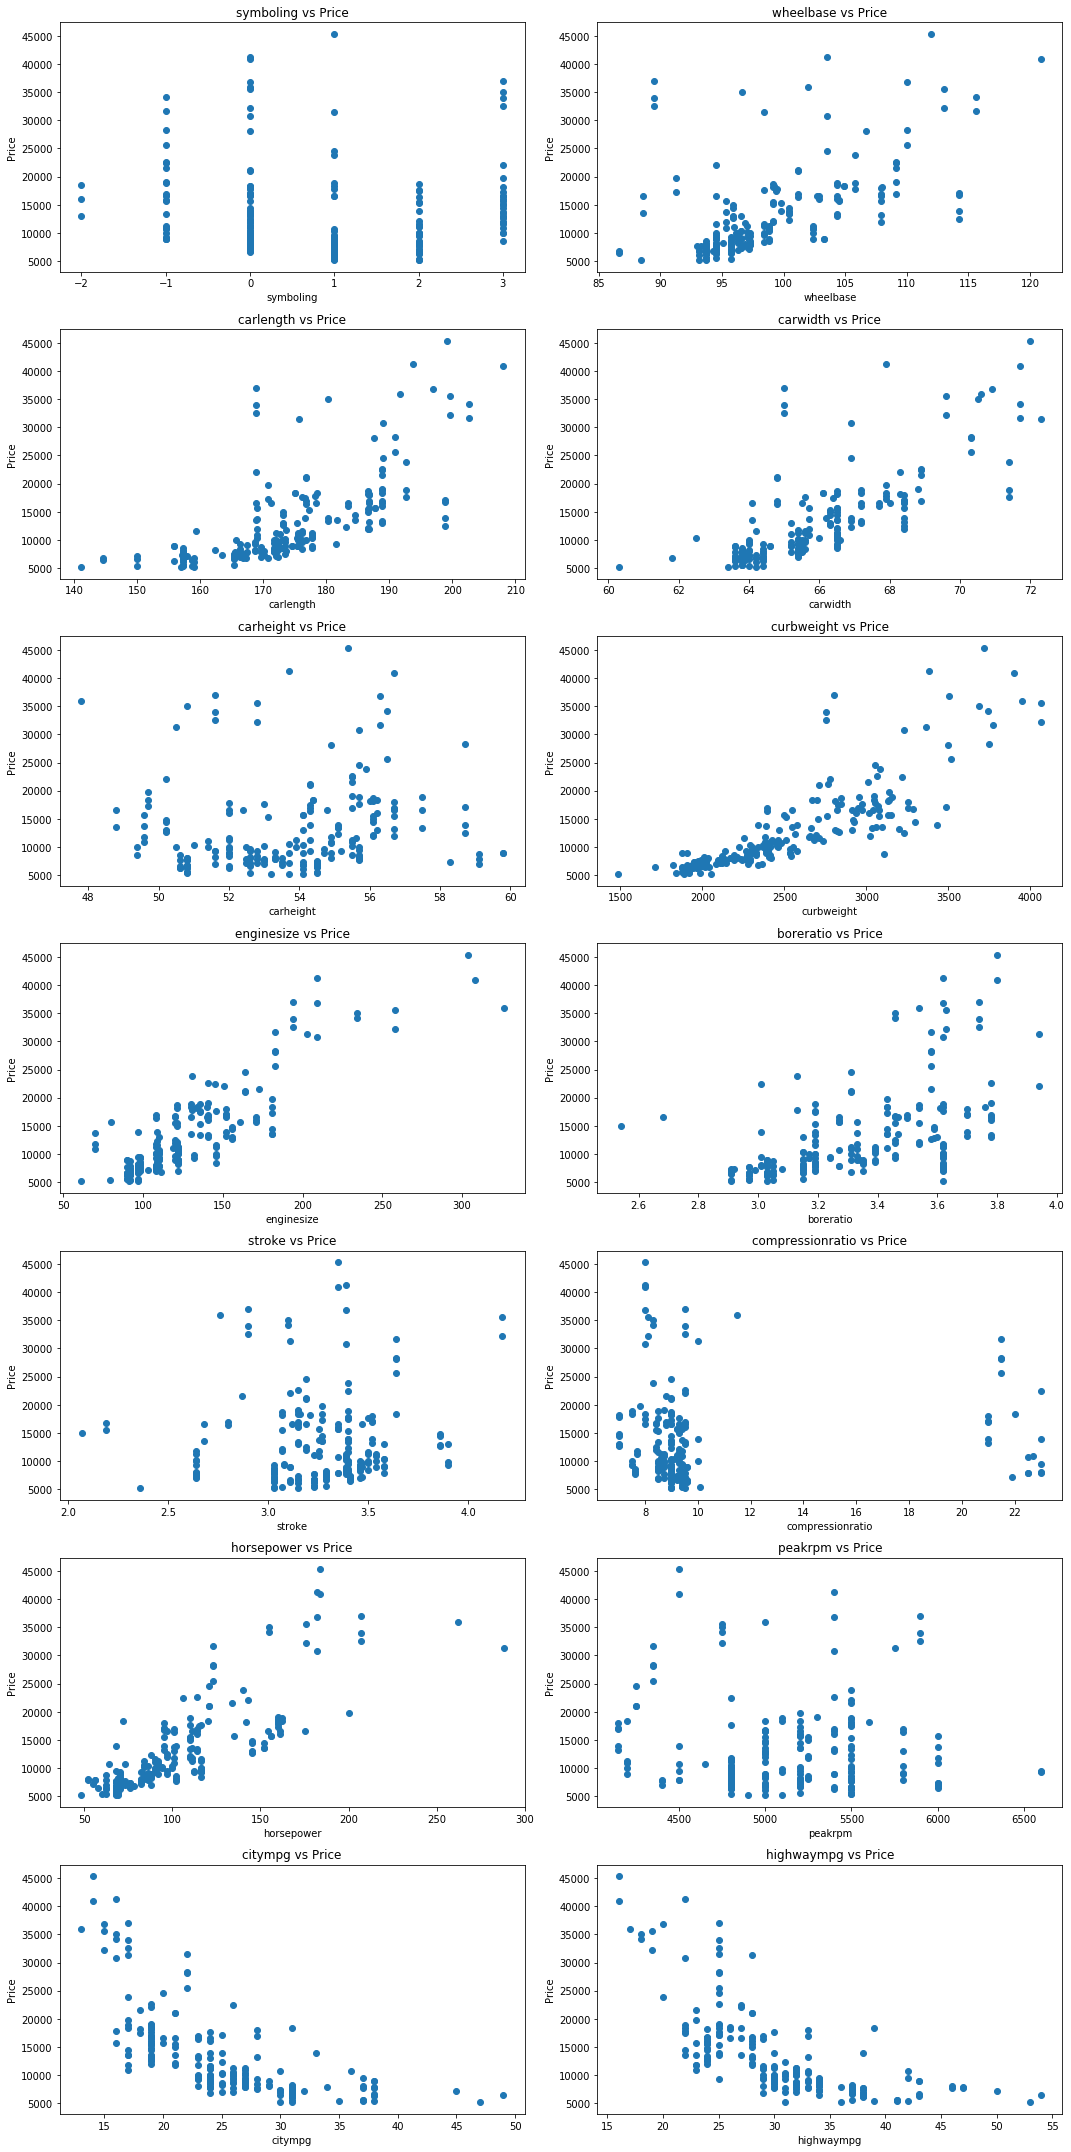

In [42]:
###For Numerical Features

def scatter(x,fig):
    plt.subplot(7,2,fig)
    plt.scatter(df[x],df["price"])
    plt.title(x+' vs Price')
    plt.xlabel(x)
    plt.ylabel("Price")
    
plt.figure(figsize=(15,30))

scatter('symboling',1)
scatter( 'wheelbase',2)
scatter('carlength',3)
scatter('carwidth',4)
scatter('carheight',5)
scatter('curbweight',6)
scatter('enginesize',7)
scatter('boreratio',8)
scatter('stroke',9)
scatter('compressionratio',10)
scatter('horsepower',11)
scatter('peakrpm',12)
scatter('citympg',13)
scatter('highwaympg',14)

plt.tight_layout()




#### From above corelation and scatter plots Car height,CompressionRatio,Peak RPM,city MPG,Highway MPG,symboling are not corelated to price. So, excluding these features we can proceed but city mpg and highway mpg are multicolinear so we can create a new vaiable by taking mean of both.

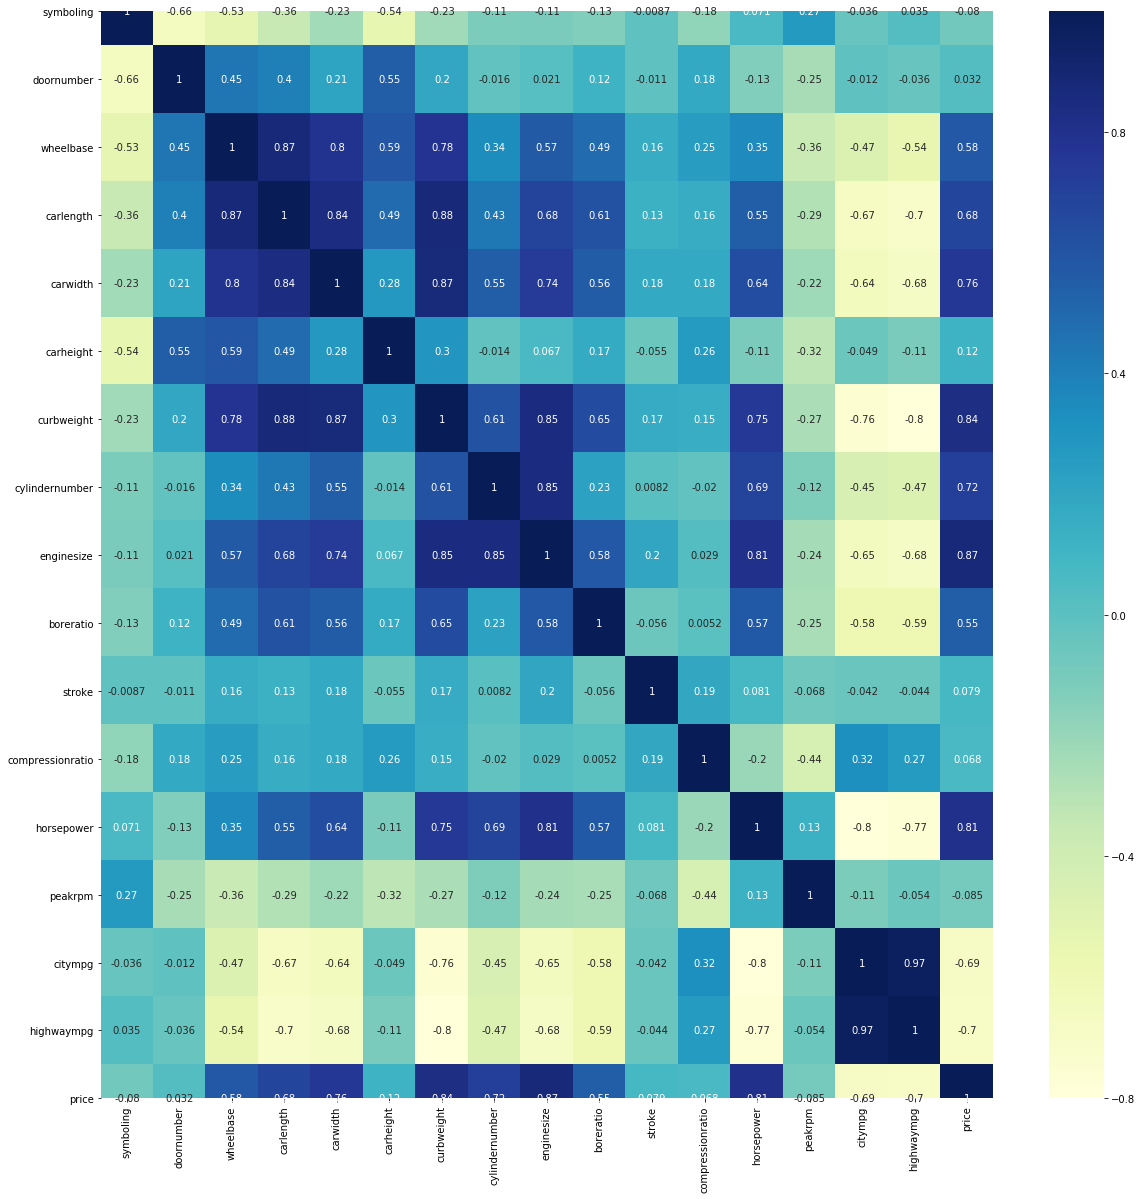

In [43]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

#### Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower.

#### Price is negatively correlated to symboling, citympg and highwaympg.

#### This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower.

#### There are many independent variables which are highly correlated: wheelbase, carlength, curbweight, enginesize etc.. all are positively correlated.

# Creating Dummies

In [44]:
#creating dummies
cars_dummies = pd.get_dummies(df_categorical, drop_first = True)
cars_dummies.shape

(205, 43)

In [45]:
df_car = pd.concat([df, cars_dummies], axis =1)

In [46]:
df_car=df_car.drop(["CarCompany","fueltype","aspiration","carbody","drivewheel","enginelocation","enginetype","fuelsystem"],axis=1)


In [47]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
symboling                 205 non-null int64
doornumber                205 non-null int64
wheelbase                 205 non-null float64
carlength                 205 non-null float64
carwidth                  205 non-null float64
carheight                 205 non-null float64
curbweight                205 non-null int64
cylindernumber            205 non-null int64
enginesize                205 non-null int64
boreratio                 205 non-null float64
stroke                    205 non-null float64
compressionratio          205 non-null float64
horsepower                205 non-null int64
peakrpm                   205 non-null int64
citympg                   205 non-null int64
highwaympg                205 non-null int64
price                     205 non-null float64
fueltype_gas              205 non-null uint8
CarCompany_alfa-romero    205 non-null uint8
CarCompany_audi         

#  Model building

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
df_train, df_test = train_test_split(df_car, train_size = 0.7, test_size = 0.3, random_state = 100)

Rescaling the data

In [50]:
df_train.shape

(143, 60)

In [51]:
df_test.shape

(62, 60)

In [52]:
scaler = StandardScaler()


In [53]:
col_list=["symboling","doornumber","wheelbase","carlength","carwidth","carheight","curbweight","cylindernumber","enginesize",
          "boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]

In [54]:
df_train[col_list] = scaler.fit_transform(df_train[col_list])

In [55]:
df_train.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,CarCompany_alfa-romero,CarCompany_audi,CarCompany_bmw,CarCompany_buick,CarCompany_chevrolet,CarCompany_dodge,CarCompany_honda,CarCompany_isuzu,CarCompany_jaguar,CarCompany_mazda,CarCompany_mercury,CarCompany_mitsubishi,CarCompany_peugeot,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,5.473477e-17,9.006005e-17,1.538785e-15,2.003060e-16,-4.093074e-15,5.450186e-16,-1.894367e-16,-3.726623e-16,-4.308908e-17,-1.059758e-15,2.155230e-15,7.259151e-17,1.195625e-16,6.009179e-16,2.655219e-16,1.599342e-16,1.925422e-16,0.909091,0.020979,0.034965,0.041958,0.034965,0.020979,0.041958,0.062937,0.020979,0.020979,0.090909,0.0,0.062937,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958,0.181818,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,0.288490,0.143818,0.184337,0.201198,0.184337,0.143818,0.201198,0.243703,0.143818,0.143818,0.288490,0.0,0.243703,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198,0.387050,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,-2.347020e+00,-1.126872e+00,-2.006930e+00,-2.574223e+00,-2.510760e+00,-2.371619e+00,-1.937401e+00,-2.084351e+00,-1.566427e+00,-2.412359e+00,-3.403827e+00,-8.072216e-01,-1.378157e+00,-2.043565e+00,-1.855458e+00,-1.996497e+00,-1.020394e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,-6.689008e-01,-1.126872e+00,-6.771770e-01,-6.186702e-01,-8.565171e-01,-7.222984e-01,-7.711028e-01,-3.514313e-01,-6.847340e-01,-9.320600e-01,-4.497569e-01,-3.841200e-01,-8.223718e-01,-6.882361e-01,-9.570476e-01,-8.452912e-01,-7.072706e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,

In [56]:
y_train = df_train.pop('price')
X_train = df_train

### Model building using RFE with 15 variables

In [57]:
lr = LinearRegression()
lr.fit(X_train,y_train)

# Subsetting training data for 15 selected columns
rfe = RFE(lr,15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [58]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 40),
 ('doornumber', False, 38),
 ('wheelbase', False, 19),
 ('carlength', False, 20),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', False, 11),
 ('cylindernumber', False, 7),
 ('enginesize', True, 1),
 ('boreratio', False, 4),
 ('stroke', False, 9),
 ('compressionratio', False, 17),
 ('horsepower', False, 26),
 ('peakrpm', False, 24),
 ('citympg', False, 35),
 ('highwaympg', False, 28),
 ('fueltype_gas', False, 15),
 ('CarCompany_alfa-romero', False, 27),
 ('CarCompany_audi', False, 32),
 ('CarCompany_bmw', True, 1),
 ('CarCompany_buick', True, 1),
 ('CarCompany_chevrolet', False, 21),
 ('CarCompany_dodge', False, 14),
 ('CarCompany_honda', False, 23),
 ('CarCompany_isuzu', False, 36),
 ('CarCompany_jaguar', False, 43),
 ('CarCompany_mazda', False, 30),
 ('CarCompany_mercury', False, 39),
 ('CarCompany_mitsubishi', True, 1),
 ('CarCompany_peugeot', True, 1),
 ('CarCompany_plymouth', False, 13),
 ('CarCompany_porsche', True, 1),
 ('CarCompany_

In [59]:
cols = X_train.columns[rfe.support_]
cols

Index(['carwidth', 'enginesize', 'CarCompany_bmw', 'CarCompany_buick',
       'CarCompany_mitsubishi', 'CarCompany_peugeot', 'CarCompany_porsche',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginelocation_rear', 'enginetype_l',
       'enginetype_rotor'],
      dtype='object')

### Model=1

In [60]:

X1 = X_train[cols]
X1_sm = sm.add_constant(X1)

lr_1 = sm.OLS(y_train,X1_sm).fit()

In [61]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     115.3
Date:                Wed, 22 Jul 2020   Prob (F-statistic):           2.78e-66
Time:                        15:02:01   Log-Likelihood:                -11.137
No. Observations:                 143   AIC:                             54.27
Df Residuals:                     127   BIC:                             101.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.39

All the p- values are significant. Let us check VIF.

In [62]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
5,CarCompany_peugeot,10.63
13,enginetype_l,9.77
0,carwidth,4.11
1,enginesize,3.34
12,enginelocation_rear,2.20
6,CarCompany_porsche,1.83
7,aspiration_turbo,1.71
8,carbody_hardtop,1.52
9,carbody_hatchback,1.48
3,CarCompany_buick,1.41


As VIF values of some variables are high by our std practice VIF value should be less than 2.6. So, instead of removing it we will build the model by 10 variables.

In [63]:
lr2 = LinearRegression()

rfe2 = RFE(lr2,10)
rfe2.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [64]:
lr2 = LinearRegression()

rfe2 = RFE(lr2,10)
rfe2.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [65]:
supported_cols = X_train.columns[rfe2.support_]
supported_cols

Index(['enginesize', 'CarCompany_bmw', 'CarCompany_buick',
       'CarCompany_peugeot', 'CarCompany_porsche', 'carbody_hardtop',
       'carbody_hatchback', 'enginelocation_rear', 'enginetype_l',
       'enginetype_rotor'],
      dtype='object')

### MODEL=2

In [66]:

X2 = X_train[supported_cols]
X2_sm = sm.add_constant(X2)

model_2 = sm.OLS(y_train,X2_sm).fit()

In [67]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     94.98
Date:                Wed, 22 Jul 2020   Prob (F-statistic):           2.77e-55
Time:                        15:04:54   Log-Likelihood:                -52.500
No. Observations:                 143   AIC:                             127.0
Df Residuals:                     132   BIC:                             159.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0850    

All the p- values are significant. Let us check VIF.

In [68]:

#VIF
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,CarCompany_peugeot,9.40
8,enginetype_l,9.37
7,enginelocation_rear,2.02
4,CarCompany_porsche,1.65
5,carbody_hardtop,1.50
0,enginesize,1.46
6,carbody_hatchback,1.21
2,CarCompany_buick,1.19
9,enginetype_rotor,1.14
1,CarCompany_bmw,1.07


### MODEL=3 by dropping "CarCompany_peugeot"

In [69]:
X3 = X2.drop(['CarCompany_peugeot'], axis =1)
X3_sm = sm.add_constant(X3)

Model_3 = sm.OLS(y_train,X3_sm).fit()

In [70]:
print(Model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     106.0
Date:                Wed, 22 Jul 2020   Prob (F-statistic):           3.13e-56
Time:                        15:05:47   Log-Likelihood:                -52.697
No. Observations:                 143   AIC:                             125.4
Df Residuals:                     133   BIC:                             155.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0880    

All the p- values are significant. Let us check VIF.

In [72]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
6,enginelocation_rear,2.02
3,CarCompany_porsche,1.65
4,carbody_hardtop,1.50
0,enginesize,1.42
5,carbody_hatchback,1.19
2,CarCompany_buick,1.18
8,enginetype_rotor,1.13
1,CarCompany_bmw,1.07
7,enginetype_l,1.00


### MODEL=4 by dropping "enginelocation_rear"

In [73]:
X4 = X3.drop(['enginelocation_rear'], axis =1)
X4_sm = sm.add_constant(X4)

Model_4 = sm.OLS(y_train,X4_sm).fit()

In [79]:
print(Model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     118.1
Date:                Wed, 22 Jul 2020   Prob (F-statistic):           7.69e-57
Time:                        15:08:00   Log-Likelihood:                -53.797
No. Observations:                 143   AIC:                             125.6
Df Residuals:                     134   BIC:                             152.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0881      0

All the VIF values and p-values seem to be in a good range. Also the Adjusted R-squared is 87%. 
This model is explaining most of the variance without being too complex.

In [74]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,enginesize,1.42
3,CarCompany_porsche,1.24
2,CarCompany_buick,1.18
5,carbody_hatchback,1.18
4,carbody_hardtop,1.13
7,enginetype_rotor,1.13
1,CarCompany_bmw,1.07
6,enginetype_l,1.00


In [75]:
y_train_pred = Model_4.predict(X4_sm)
y_train_pred.head()

122   -0.577600
125    1.465941
166   -0.754694
1      0.003454
199    0.003454
dtype: float64

### Residuals

In [76]:
Residual = y_train- y_train_pred

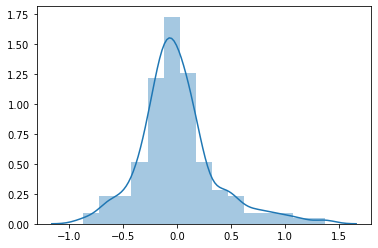

In [81]:
sns.distplot(Residual, bins =15)

Error is normally distributed

### Prediction Analysis

In [83]:
df_test[col_list] = scaler.transform(df_test[col_list])

In [84]:
y_test = df_test.pop('price')
X_test = df_test

In [85]:
final_cols = X4.columns

In [86]:
X_test_model4= X_test[final_cols]
X_test_model4

,enginesize,CarCompany_bmw,CarCompany_buick,CarCompany_porsche,carbody_hardtop,carbody_hatchback,enginetype_l,enginetype_rotor
160,-0.660242,0,0,0,0,0,0,0
186,-0.390836,0,0,0,0,0,0,0
59,-0.072447,0,0,0,0,1,0,0
165,-0.660242,0,0,0,0,0,0,0
140,-0.415328,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
28,-0.072447,0,0,0,0,0,0,0
29,0.760264,0,0,0,0,1,0,0
182,-0.684734,0,0,0,0,0,0,0
40,-0.366345,0,0,0,0,0,0,0


In [87]:
X_test_sm = sm.add_constant(X_test_model4)

In [88]:
X_test_sm

,const,enginesize,CarCompany_bmw,CarCompany_buick,CarCompany_porsche,carbody_hardtop,carbody_hatchback,enginetype_l,enginetype_rotor
160,1.0,-0.660242,0,0,0,0,0,0,0
186,1.0,-0.390836,0,0,0,0,0,0,0
59,1.0,-0.072447,0,0,0,0,1,0,0
165,1.0,-0.660242,0,0,0,0,0,0,0
140,1.0,-0.415328,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
28,1.0,-0.072447,0,0,0,0,0,0,0
29,1.0,0.760264,0,0,0,0,1,0,0
182,1.0,-0.684734,0,0,0,0,0,0,0
40,1.0,-0.366345,0,0,0,0,0,0,0


In [89]:
y_test_pred = Model_4.predict(X_test_sm)

In [90]:
y_test_pred.head()

160   -0.577600
186   -0.377863
59    -0.318903
165   -0.577600
140   -0.573114
dtype: float64

Text(0, 0.5, 'VOC')

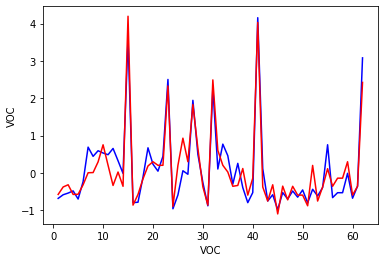

In [91]:

c = [i for i in range(1,63,1)]
plt.plot(c, y_test,color = 'Blue')
plt.plot(c, y_test_pred,color = 'red')
plt.xlabel("VOC")
plt.ylabel("VOC")


Text(0, 0.5, 'y_test_pred')

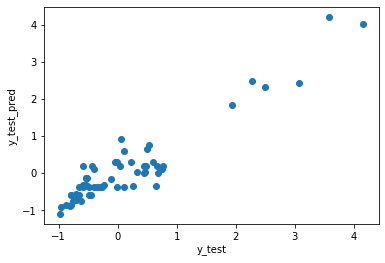

In [92]:

plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

In [93]:
r_squ = r2_score(y_test,y_test_pred)
r_squ

0.8837114771596791

### Final Variables to predict car price: "enginesize"	"CarCompany_bmw"	"CarCompany_buick"	"CarCompany_porsche"	"carbody_hardtop"	"carbody_hatchback"	"enginetype_l"	"enginetype_rotor"